# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import PIL
warnings.filterwarnings('ignore')

# Download dataset

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-01-10 19:39:40--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.73.13.109, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.73.13.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   278MB/s    in 2.8s    

2023-01-10 19:39:43 (278 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
# unzip the dataset
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

## Perform files check

In [ ]:
for filename in os.listdir('PetImages'):
  for image in os.listdir(os.path.join("PetImages", filename)):
    if image.endswith('.jpg'):
      try:
        img = PIL.Image.open(os.path.join("PetImages", filename, image))  # open the image file
        img.verify()  # verify that it is, in fact an image
      except (IOError, SyntaxError) as e:
        print(f"{image} is a broken image file")
        os.remove(os.path.join("PetImages", filename, image))
    else:
      print(f"{image} is not an image file")
      os.remove(os.path.join("PetImages", filename, image))

666.jpg is a broken image file
Thumbs.db is not an image file
11702.jpg is a broken image file
Thumbs.db is not an image file


# Create DataFrame of Input and Output

In [ ]:
# placeholder of the pathes
input_path = []
# placeholder of the labels of each example
label = []
# iterate through the outer folder
for folder in os.listdir("PetImages"):
  # iterate through the inner folder
  for path in os.listdir("PetImages/"+ folder):
    if folder == "Cat":
      label.append('0')
    elif folder == "Dog":
      label.append('1')
    # add the path of the specific image
    input_path.append(os.path.join("PetImages", folder, path))
# check the process
print("The path of the first image is:", input_path[0], " and the label of it is:", label[0])
print("The number of examples are:", len(input_path))

The path of the first image is: PetImages/Cat/2897.jpg  and the label of it is: 0
The number of examples are: 24998


In [ ]:
# create dataframe
cat_dog_df = pd.DataFrame(data= {"image": input_path, 
                                  "label": label})
# shuffle the data
cat_dog_df= cat_dog_df.sample(frac= 1).reset_index(drop= True)
# check the dataset
cat_dog_df

,image,label
0,PetImages/Dog/9680.jpg,1
1,PetImages/Dog/10835.jpg,1
2,PetImages/Dog/4218.jpg,1
3,PetImages/Dog/1099.jpg,1
4,PetImages/Cat/5491.jpg,0
...,...,...
24993,PetImages/Dog/1878.jpg,1
24994,PetImages/Cat/9507.jpg,0
24995,PetImages/Dog/137.jpg,1
24996,PetImages/Dog/8351.jpg,1


# EDA

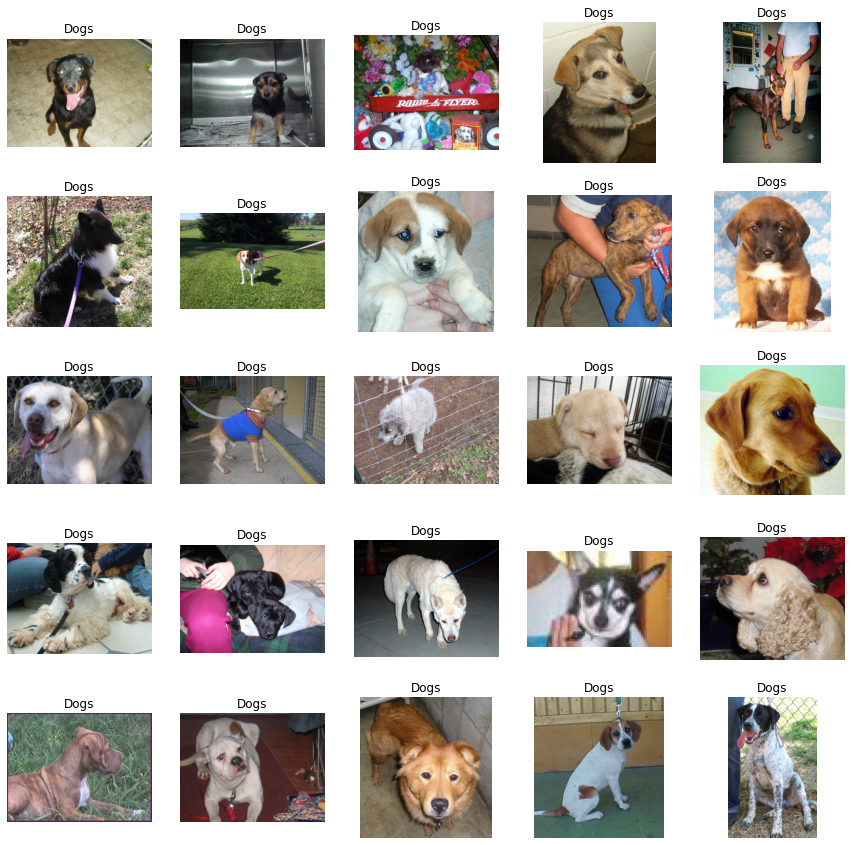

In [ ]:
# display some of images for analysis purpose
plt.figure(figsize= (15, 15))
# specify dog images
dog_images = cat_dog_df[cat_dog_df["label"]=='1']["image"]
# choose random seed
random_seed= np.random.randint(0, len(dog_images)-26)
# selcet diaplay range
selected_files = dog_images[random_seed: random_seed+ 25]
# display the images
for index, selected_file in enumerate(selected_files):
  plt.subplot(5, 5, index +1)
  img = load_img(selected_file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Dogs")
  plt.axis("off")

**Discussion Stage**\
Here we notice the contrast in color, shape, and background between images.

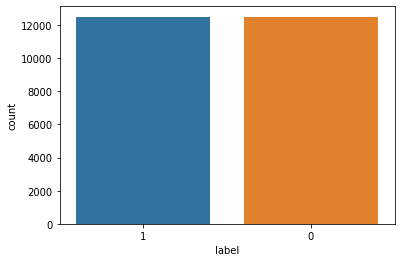

In [ ]:
# check the balance of the target classes
sns.countplot(cat_dog_df["label"])

**Discussion Stage**\
We see here an equal count of the classes.

In [ ]:
# finding images size
# loading the image
img = PIL.Image.open("PetImages/Cat/1206.jpg")
# fetching the dimensions
wid, hgt = img.size
# displaying the dimensions
print(str(wid) + "x" + str(hgt))

500x456


# Create DataGenerator for the training images

In [ ]:
# stratified split and shuffle the data
train_data, val_data = train_test_split(cat_dog_df,
                                        test_size= 0.2, 
                                        random_state= 42, 
                                        stratify= cat_dog_df["label"]
                                        )

In [ ]:
# check the shapes
print(f"The shape of train data is: {train_data.shape}, and the shape of validation data is: {val_data.shape}")

The shape of train data is: (19998, 2), and the shape of validation data is: (5000, 2)


In [ ]:
train_data_gen = ImageDataGenerator(
    # augmentation
    rotation_range= 45,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    # rescale as a normalization
    rescale=1.255,
)

In [ ]:
# flow the data from the dataframe
train_data = train_data_gen.flow_from_dataframe(
    train_data,
    x_col = "image",
    y_col = "label",
    target_size = (256, 256),
    batch_size = 64,
    shuffle = True,
    class_mode = "binary"
    )

val_data = ImageDataGenerator(rescale=1.255).flow_from_dataframe(
    val_data,
    x_col = "image",
    y_col = "label",
    target_size = (256, 256),
    batch_size = 64,
    shuffle = True,
    class_mode = "binary"
    )

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [ ]:
# build the model
model = Sequential([
    # create firest layer
    Conv2D(16, (3, 3), activation= 'relu', input_shape = (256, 256, 3)),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation= 'relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation= 'relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
# compile the model
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# get a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)      

In [21]:
# train the model
history = model.fit(train_data, epochs= 16, validation_data = val_data)

Epoch 1/16
313/313 [==============================] - 312s 993ms/step - loss: 23.7439 - accuracy: 0.5720 - val_loss: 0.6659 - val_accuracy: 0.5938
Epoch 2/16
313/313 [==============================] - 310s 990ms/step - loss: 0.6558 - accuracy: 0.6178 - val_loss: 0.6372 - val_accuracy: 0.6366
Epoch 3/16
313/313 [==============================] - 308s 983ms/step - loss: 0.6282 - accuracy: 0.6483 - val_loss: 0.6078 - val_accuracy: 0.6688
Epoch 4/16
313/313 [==============================] - 309s 989ms/step - loss: 0.6021 - accuracy: 0.6747 - val_loss: 0.5922 - val_accuracy: 0.6764
Epoch 5/16
313/313 [==============================] - 311s 992ms/step - loss: 0.5777 - accuracy: 0.6973 - val_loss: 0.5485 - val_accuracy: 0.7326
Epoch 6/16
313/313 [==============================] - 308s 985ms/step - loss: 0.5737 - accuracy: 0.7000 - val_loss: 0.5464 - val_accuracy: 0.7258
Epoch 7/16
313/313 [==============================] - 308s 983ms/step - loss: 0.5628 - accuracy: 0.7072 - val_loss: 0.5360 

**Discussion Stage**\
We can still improve the performance by increasing the number of epochs, the number of target size of the images, or manipulating with the CNN layers, or batch size.. etc., but because of the long take it take to try these different ways by increasing and manipulating with it, I will leave it like what you saw.

In [22]:
print("Feature extraction from the model")
feature_extractor = tf.keras.Model(
   inputs= model.inputs,
   outputs= model.get_layer(index= 3).output,
)
print("The feature extractor method is called on test data")
x = tf.ones((1, 256, 256, 3))
features = feature_extractor(x)
features

Feature extraction from the model
The feature extractor method is called on test data


<tf.Tensor: shape=(1, 62, 62, 32), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.15735424,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

# Visualize the results

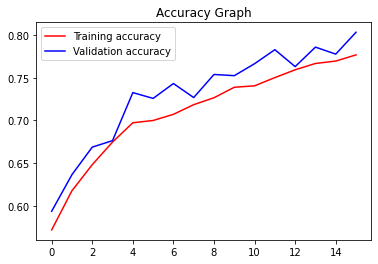

In [23]:
# get training and validation accuracy
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
# get the number of epochs
n_epoch = range(len(train_acc))
# plot the graphs
plt.plot(n_epoch, train_acc, color= "r", label = "Training accuracy")
plt.plot(n_epoch, val_acc, color= "b", label = "Validation accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.show()

**Discussion Stage**\
There is no overfit, and the performance could still improve smoothly.

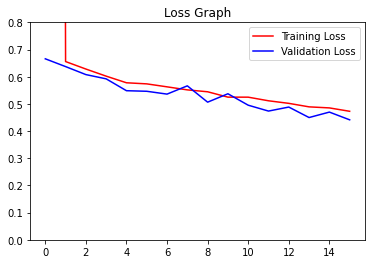

In [24]:
# get training and validation loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
# plot the graphs
plt.plot(n_epoch, train_loss, color= "r", label = "Training Loss")
plt.plot(n_epoch, val_loss, color= "b", label = "Validation Loss")
plt.ylim([0, 0.8])
plt.title("Loss Graph")
plt.legend()
plt.show()

**Discussion Stage**\
Here we could see the gradual decreasing of the loss that point to the improving of the model performance.